# Problem Statement:
- We have to build a solution that should able to predict the premium of the person for health insurance.

# Dataset description:
1. Age: Person's age in years
2. Sex: Gender of the person or insurance holder(Female or Male)
3. BMI: Body mass index. The ideal range according to height and weight is 18.5 to 24.9
4. Children: Number of dependents
5. Smoker: Whether the insurance holder smokes or not
6. Region: Residential area of the person
7. Expenses: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Data exploration**
- We will explore the data by various methods to get insights of the data.

In [3]:
#Data description
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [4]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='expenses'>

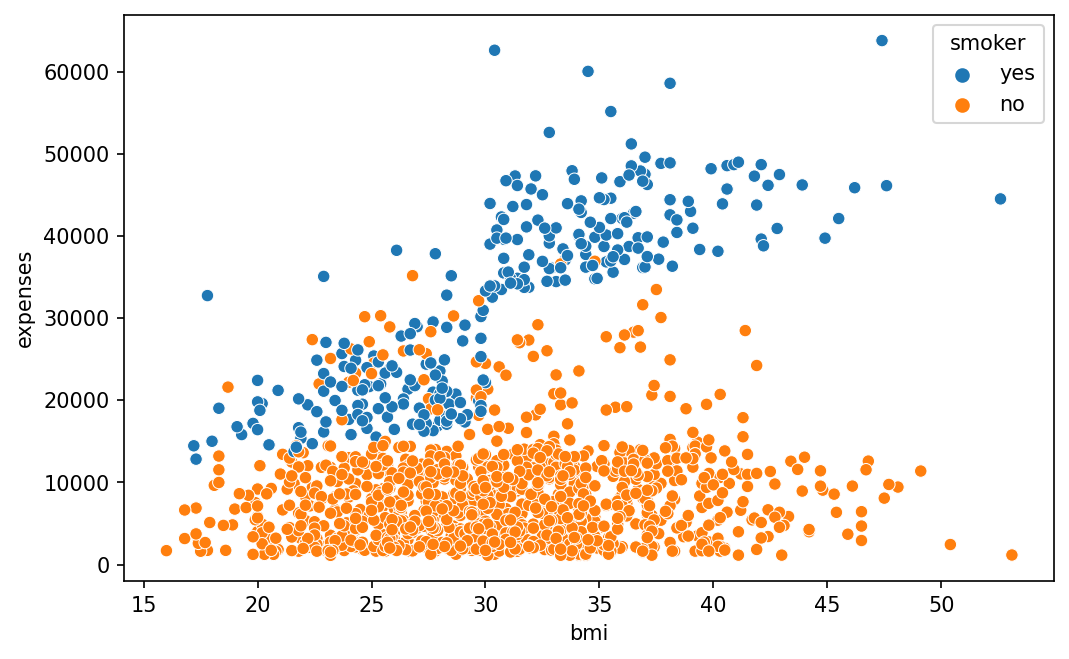

In [8]:
sns.scatterplot('bmi','expenses',hue='smoker', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

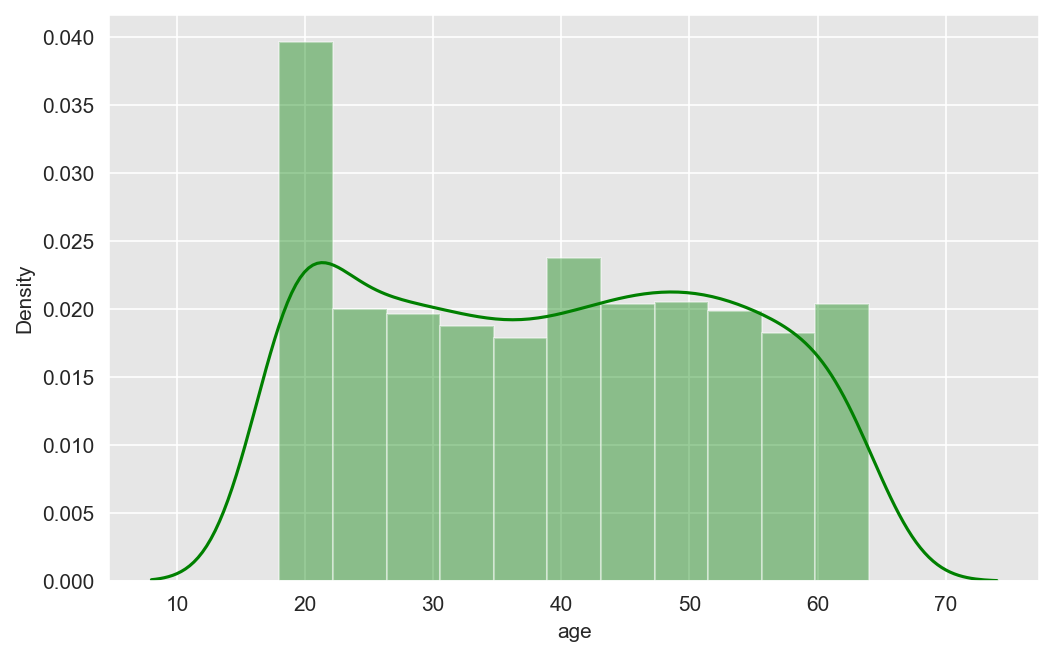

In [9]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.distplot(df['age'], color='g')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

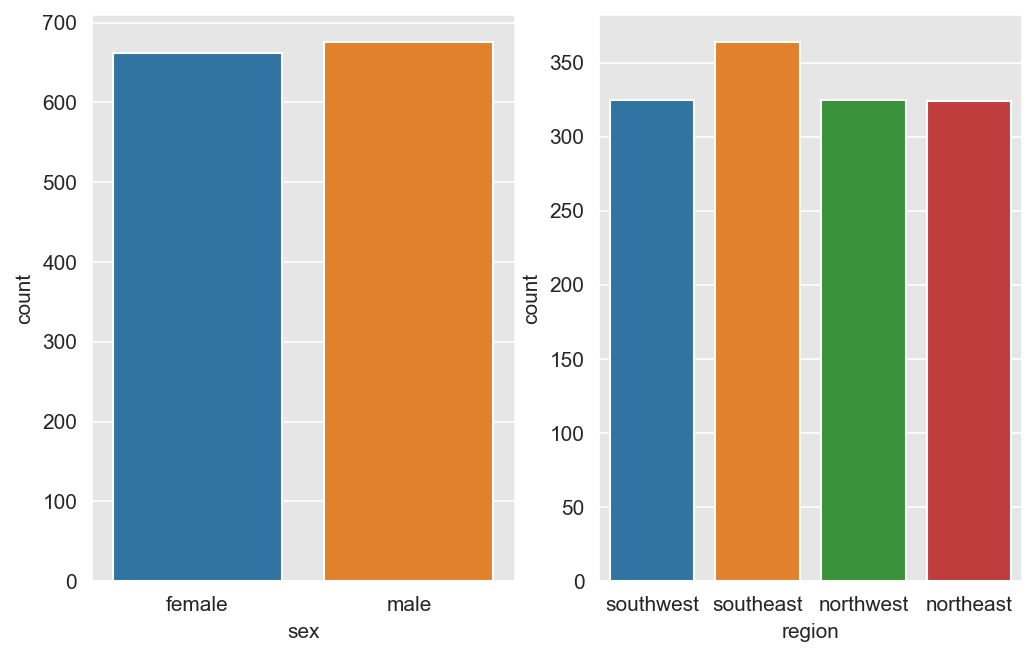

In [10]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['sex'], ax=ax[0])
sns.countplot(df['region'], ax=ax[1])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

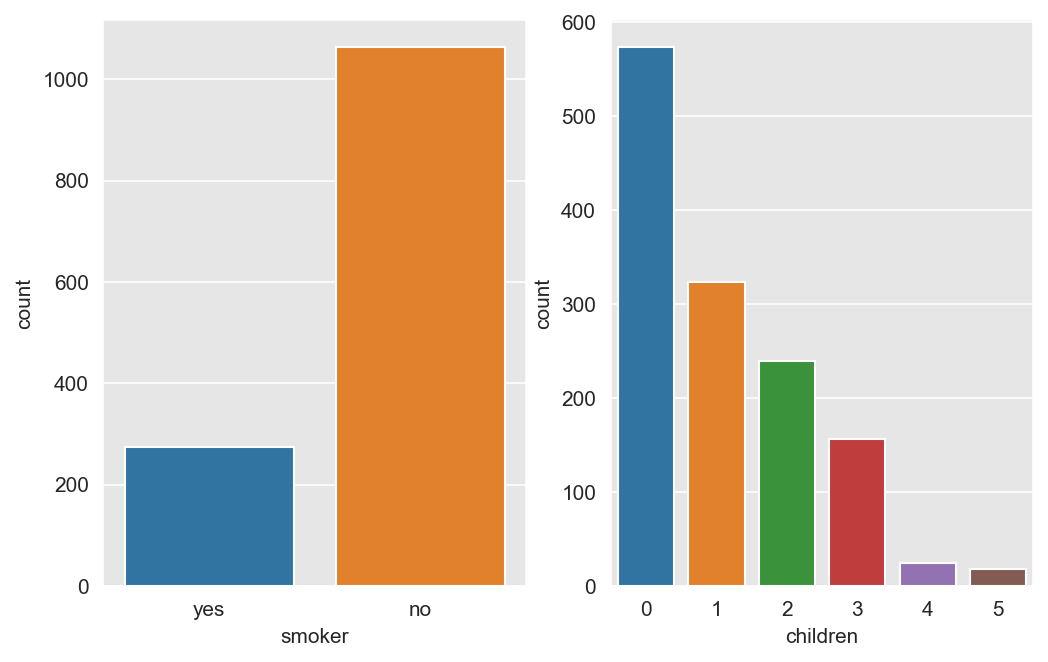

In [11]:
fig, ax =plt.subplots(1,2)
sns.countplot(df['smoker'], ax=ax[0])
sns.countplot(df['children'], ax=ax[1])


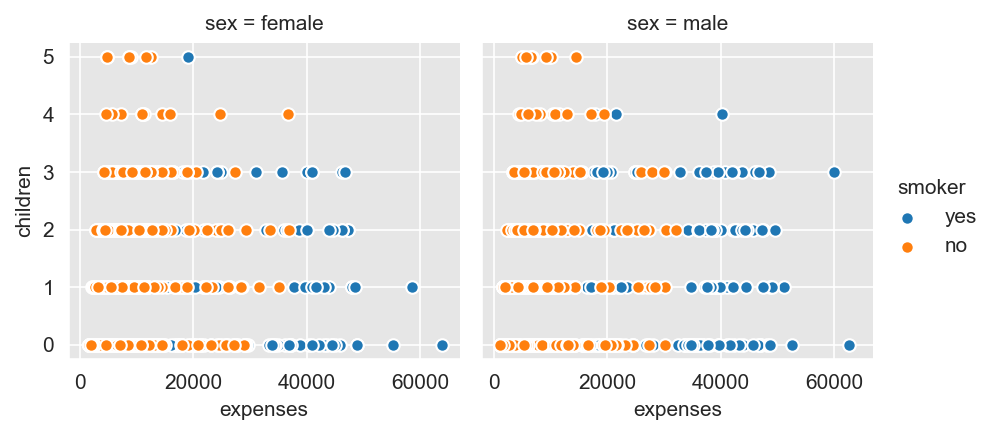

In [12]:
graph = sns.FacetGrid(df, col='sex',hue='smoker')
graph.map(plt.scatter,'expenses','children',edgecolor = 'w').add_legend()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

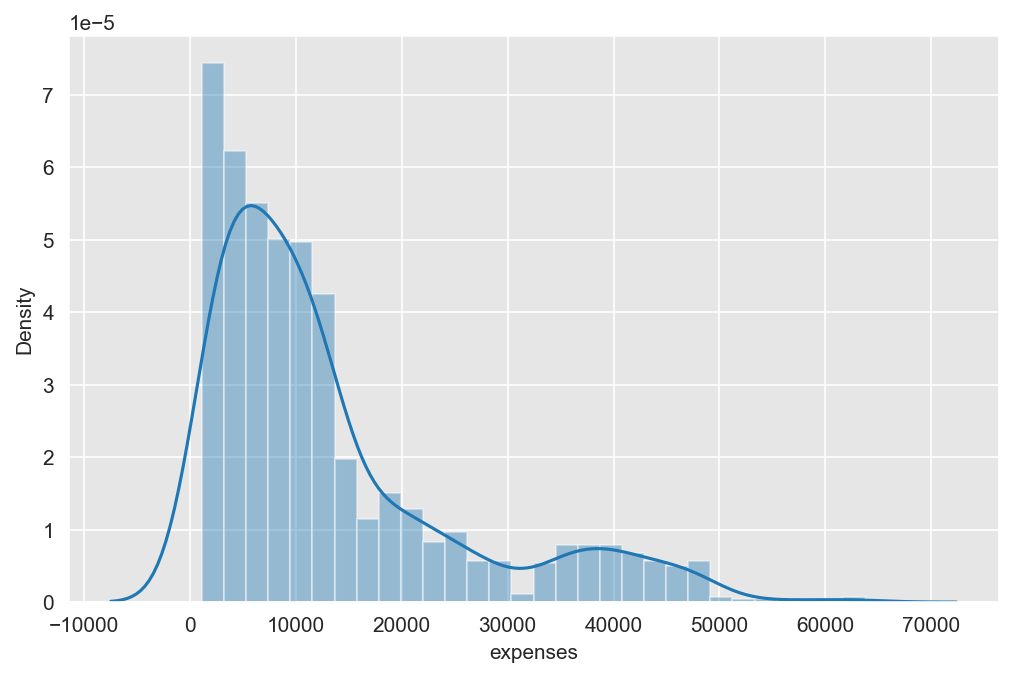

In [13]:
sns.distplot(df['expenses'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

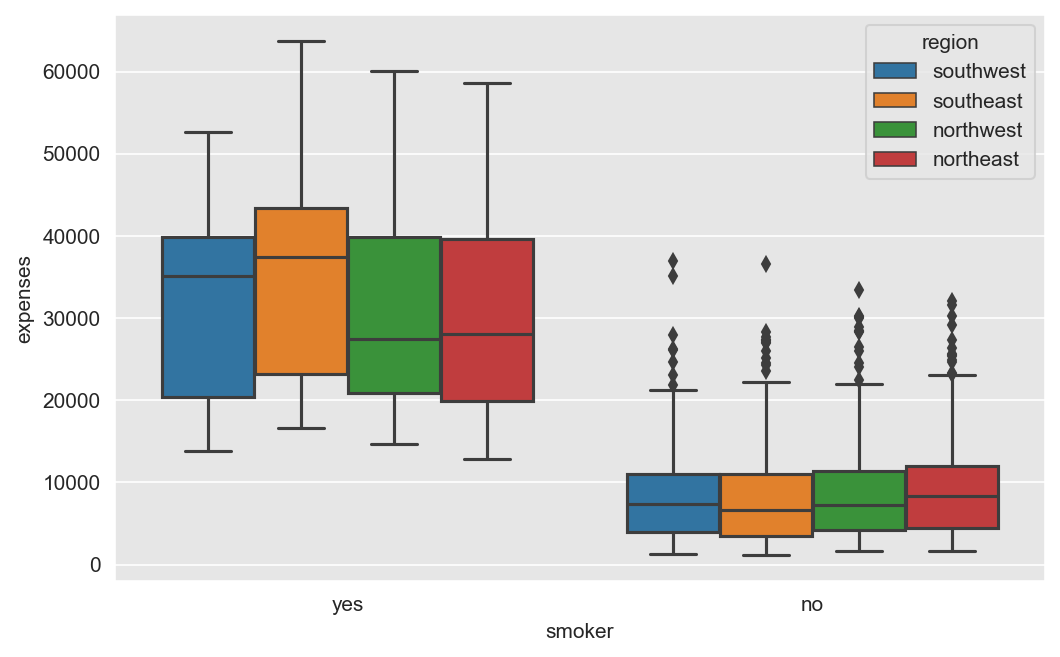

In [14]:
sns.boxplot('smoker','expenses', hue='region', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='expenses'>

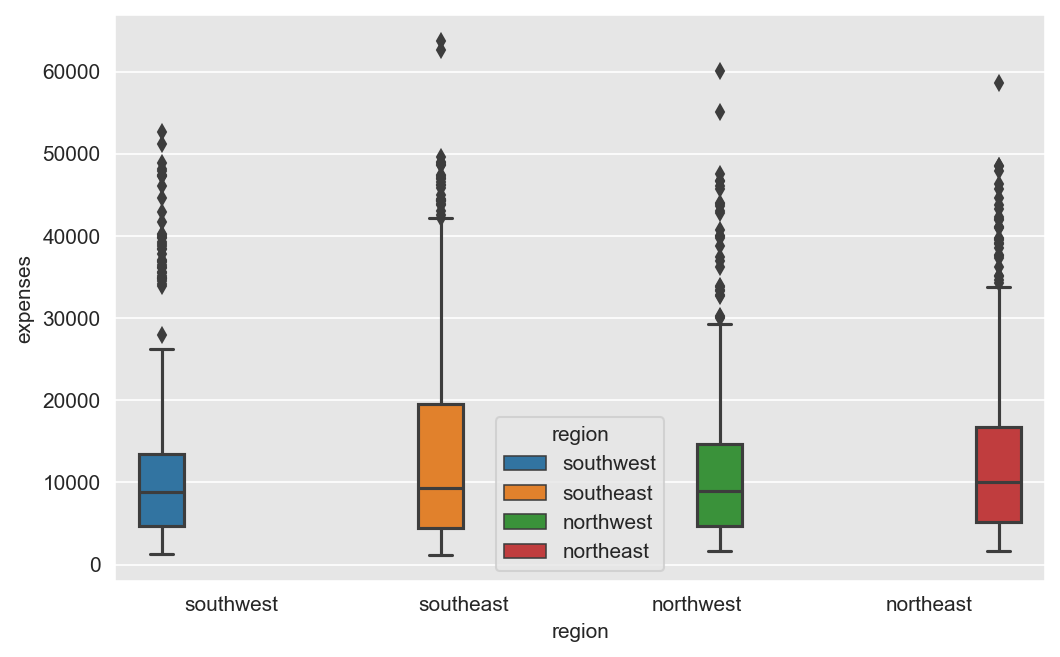

In [15]:
sns.boxplot('region','expenses', hue='region', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

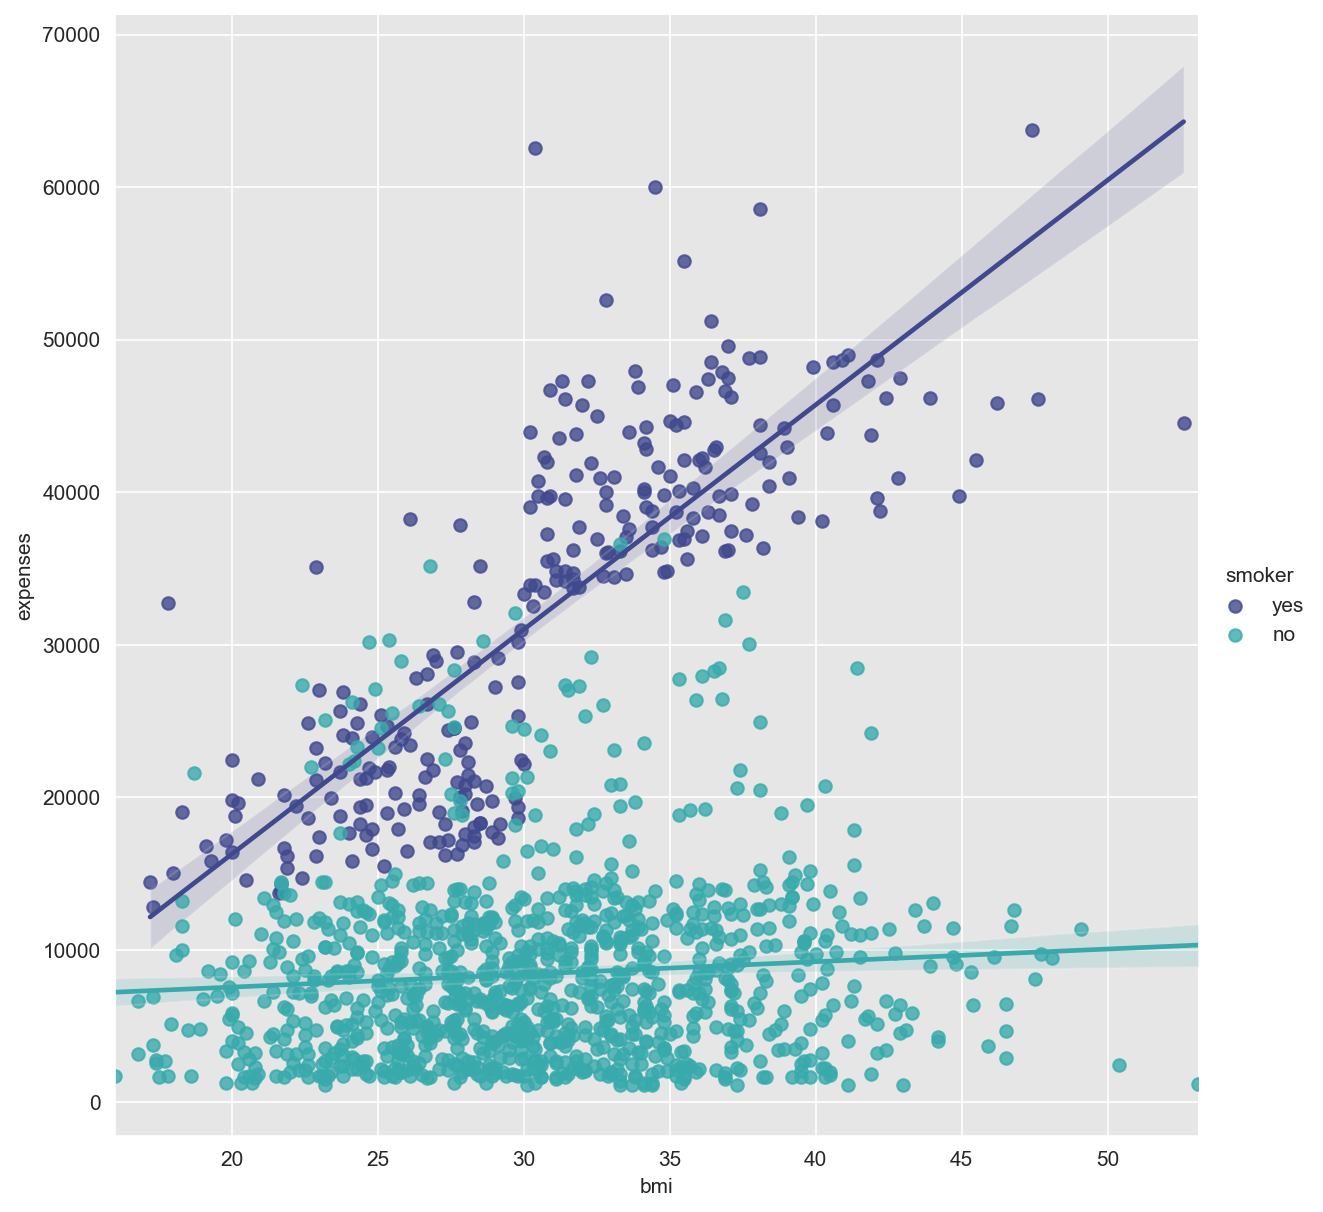

In [16]:
plt.figure(figsize=(9,5), dpi=100)
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'mako', size = 8)

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [20]:
numeric_features = ['age', 'bmi', 'children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['sex', 'smoker','region']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('expenses',axis=1)
y = df['expenses']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Creating Pipelines

In [25]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('linear_regressor', LinearRegression())])
pipeline_dt = Pipeline(steps=[('preprocessor',preprocessor),('decision_tree_regressor', DecisionTreeRegressor())])
pipeline_knn = Pipeline(steps=[('preprocessor',preprocessor),('knn',KNeighborsRegressor(n_neighbors=7))])
pipeline_rf = Pipeline(steps=[('preprocessor',preprocessor),('random_forest',RandomForestRegressor())])
pipeline_gb = Pipeline(steps=[('preprocessor',preprocessor),('gradient_boosting', GradientBoostingRegressor())])

In [26]:
pipelines = [pipeline_dt,pipeline_gb,pipeline_knn,pipeline_lr,pipeline_rf]

In [27]:
best_accuracy = 0.0
best_regressor = 0
best_pipeline = ''

In [28]:
pipe_dict = {0:'Linear Regression',1:'Decision Tree',2:'KNN',3:'Random forest',4:'Gradient boosting'}

In [29]:
for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [30]:
for i, model in enumerate(pipelines):
    print("{} Test accuarcy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Linear Regression Test accuarcy: 0.6937466566258191
Decision Tree Test accuarcy: 0.8489759814712391
KNN Test accuarcy: 0.734560492957139
Random forest Test accuarcy: 0.7163833311442904
Gradient boosting Test accuarcy: 0.8367751557704983


# Checking model performance using evaluation metrics

In [31]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error,classification_report

**1.Linear Regreesion**

In [32]:
pred_lr = pipeline_lr.predict(x_test)
linear_reg_mse = mean_squared_error(y_test, pred_lr)
linear_reg_rmse = mean_squared_error(y_test, pred_lr, squared=False)
linear_reg_r2_score = r2_score(y_test, pred_lr)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :38136276.86955909
The Root Mean Squared Error using Linear Regression :6175.4576243027595
The r2_score using Linear Regression :0.7163833311442904


**2.Decision Tree**

In [33]:
pred_dt = pipeline_dt.predict(x_test)
decision_tree_mse = mean_squared_error(y_test, pred_dt)
decision_tree_rmse = mean_squared_error(y_test, pred_dt, squared=False)
decision_tree_r2_score = r2_score(y_test, pred_dt)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 41180098.27231911
The Root Mean Squared Error using Decision Tree Regressor : 6417.172139838474
The r2_score using Decision Tree Regressor : 0.6937466566258191


**3.KNN**

In [34]:
pred_knn = pipeline_knn.predict(x_test)
knn_mse = mean_squared_error(y_test, pred_knn)
knn_rmse = mean_squared_error(y_test, pred_knn, squared=False)
knn_r2_score = r2_score(y_test, pred_knn)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 35692100.0925226
The root mean squared error using KNN is 5974.286576029192
The r2_score using KNN is 0.734560492957139


**4.Random forest**

In [35]:
pred_rf = pipeline_rf.predict(x_test)
random_forest_mse = mean_squared_error(y_test, pred_rf)
random_forest_rmse = mean_squared_error(y_test, pred_rf, squared=False)
random_forest_r2_score = r2_score(y_test, pred_rf)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))


The Mean Squared Error using Random Forest Regressor : 21947891.41499225
The Root Mean Squared Error using Random Forest Regressor : 4684.857672863953
The r2_score Error using Random Forest Regressor : 0.8367751557704983


**5.Gradient boosting**

In [36]:
pred_gb = pipeline_gb.predict(x_test)
gradient_boosting_mse = mean_squared_error(y_test, pred_gb)
gradient_boosting_rmse = mean_squared_error(y_test, pred_gb, squared=False)
gradient_boosting_r2_score = r2_score(y_test, pred_gb)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 20307317.64745604
The Root Mean Squared Error using Gradient Boosting Regressor : 4506.364127260029
The r2_sccore using Gradient Boosting Regressor : 0.8489759814712391


In [37]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,4506.364127,0.848976
2,Random Forest,4684.857673,0.836775
4,KNN,5974.286576,0.734560
0,Linear Regression,6175.457624,0.716383
1,Decision Tree,6417.172140,0.693747


- As we can see that the Gradient boosting algorithm is giving the best results, we will select Gradient boosting as a final algorithm.

In [38]:
import pickle
pickle.dump(pipeline_gb, open('gb_model.pkl', 'wb'))